In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
def to_celsius (x):
    return round ((x - 32.0) / 1.8, 1)

In [4]:
csvfile  = '48200_TBone.txt'
foodtype = 'TBone'

In [5]:
df = pd.read_csv (csvfile, usecols=[8,12,13], 
                  parse_dates=True, infer_datetime_format=True)

In [6]:
#df.head(20)

In [7]:
df['ActualTime']  = df['ActualTime'].apply(pd.to_datetime)
df['ActualTemp']  = df['ActualTemp'].apply(to_celsius)
df['ElapsedTime'] = (df['ActualTime'] - df['ActualTime'].iloc[0]).astype("timedelta64[m]")

In [8]:
#df.head(4)

In [9]:
df = df.drop(['ActualTime'], axis=1)
cols = ['ElapsedTime', 'ActualTemp', 'ProbeNumber']
df = df[cols]

In [10]:
#df.head ()

In [11]:
food = df[df["ProbeNumber"]==1].drop (['ProbeNumber'], axis=1)
bath = df[df["ProbeNumber"]==2].drop (['ProbeNumber'], axis=1)

food.rename (columns={'ActualTemp': foodtype}, inplace=True)
bath.rename (columns={'ActualTemp': 'Bath'},   inplace=True)

all = pd.merge(food, bath, on='ElapsedTime')

In [12]:
#all.head (30)

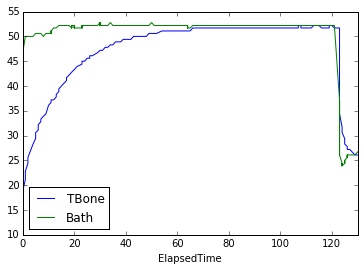

In [13]:
all.plot(x='ElapsedTime', y=[foodtype, 'Bath'])

In [14]:
plt.show()

In [15]:
all.describe()

,ElapsedTime,TBone,Bath
count,338.000000,338.000000,338.000000
mean,65.041420,46.270710,49.947337
std,38.242915,8.725528,7.024172
min,0.000000,12.800000,23.900000
25%,31.250000,45.000000,52.200000
50%,64.500000,51.100000,52.200000
75%,98.750000,51.700000,52.200000
max,130.000000,52.200000,52.800000


In [16]:
all.to_csv ('tbone-one-inch.txt')